# ***Credit EDA Case study***

## Retrieving and Understanding data 

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Setting display options

pd.set_option('display.max_columns', 500)

In [3]:
# Loading the required datasets

# Loading the dataset related to Loan Applications

application_data = pd.read_csv("application_data.csv")

In [4]:
# Displaying the loaded dataset's head for quick glance

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# View the shape of the dataset

application_data.shape

(307511, 122)

In [6]:
# Let's understand the data types of all the columns and counts

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- This is not sufficient information as there are too many columns present in the loaded dataframe, so we will handle this case in Data Handling step.

In [7]:
# Let's view the statistical information from the columns those are already numeric

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective
- We will handle and manage the missing or null values that are present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will keep only those columns that are required to achieve the business objective.
- We will ignore all the other extra informations that are present in the dataframe and are not required.

In [8]:
# Let's view first 31 columns

application_data.iloc[:,:30].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0


#### Dropping below mentioned columns after understanding their requirement.
- These columns after dropping are not going to affect the analysis according to the business objective.
    - SK_ID_CURR
    - NAME_TYPE_SUITE
    - REGION_POPULATION_RELATIVE
    - DAYS_REGISTRATION
    - DAYS_ID_PUBLISH
    - FLAG_MOBIL
    - FLAG_EMP_PHONE
    - FLAG_WORK_PHONE
    - FLAG_CONT_MOBILE
    - FLAG_PHONE
    - FLAG_EMAIL

In [9]:
# Deleting the above mentioned columns
del application_data['SK_ID_CURR']
del application_data['NAME_TYPE_SUITE']
del application_data['REGION_POPULATION_RELATIVE']
del application_data['DAYS_REGISTRATION']
del application_data['DAYS_ID_PUBLISH']
application_data.drop(application_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],axis = 1,inplace=True)

In [10]:
# Displaying the dataframe after performing the operation

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,Laborers,2.0,2,2,WEDNESDAY,17,0,

In [11]:
# Displaying the number of rows and columns

application_data.shape

(307511, 111)

In [12]:
# Let's analyze the remaining rows and their necessity for the analysis.

application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':].head()

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- This dataframe have a lot of non-required and non-essential columns and removing those may not affect our analysis to achieve the business objective.
- After having glance through the columns, only ORGANIZATION_TYPE is required, hence we will extract only that column for further analysis, and ignoring all other columns.

In [13]:
# Dropping non-essential columns from the data

application_data.drop(application_data.loc[:,'REGION_RATING_CLIENT':'LIVE_CITY_NOT_WORK_CITY'],axis = 1,inplace=True)
application_data.drop(application_data.loc[:,'EXT_SOURCE_1':],axis = 1,inplace=True)

In [14]:
# Displaying the result after dropping the columns

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,Laborers,1.0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,Core staff,2.0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,Laborers,1.0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,Laborers,2.0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,Core staff,1.0,Religion


In [15]:
# Analyze final shape of the dataframe after operations.

application_data.shape

(307511, 20)

In [16]:
# Displaying the info again so that we can get the information about data types and non-null values.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   NAME_CONTRACT_TYPE   307511 non-null  object 
 2   CODE_GENDER          307511 non-null  object 
 3   FLAG_OWN_CAR         307511 non-null  object 
 4   FLAG_OWN_REALTY      307511 non-null  object 
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307499 non-null  float64
 9   AMT_GOODS_PRICE      307233 non-null  float64
 10  NAME_INCOME_TYPE     307511 non-null  object 
 11  NAME_EDUCATION_TYPE  307511 non-null  object 
 12  NAME_FAMILY_STATUS   307511 non-null  object 
 13  NAME_HOUSING_TYPE    307511 non-null  object 
 14  DAYS_BIRTH           307511 non-null  int64  
 15  DAYS_EMPLOYED    

- Now, we have information about columns that are required for analysis. Now we are going to analyze each and every column for null checks and missing values. We can then perform sanity checks also.

In [17]:
# Let's analyze the count of null values present in all the columns.

application_data.isnull().sum()

TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
OWN_CAR_AGE            202929
OCCUPATION_TYPE         96391
CNT_FAM_MEMBERS             2
ORGANIZATION_TYPE           0
dtype: int64

In [18]:
# Let's find the percentage of missing data in the OWN_CAR_AGE column

application_data.OWN_CAR_AGE.isnull().sum()/application_data.shape[0]*100

65.9908100848425

In [19]:
# As 65% data is missing in the OWN_CAR_AGE column, so we will discard the column from analysis

application_data.drop(columns=['OWN_CAR_AGE'],axis = 1,inplace=True)

In [20]:
# Let's again analyze the count of null values present in all the columns.

application_data.isnull().sum()

TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        96391
CNT_FAM_MEMBERS            2
ORGANIZATION_TYPE          0
dtype: int64

In [21]:
# Let's find the percentage of missing data in the OCCUPATION_TYPE column.

application_data.OCCUPATION_TYPE.isnull().sum()/application_data.shape[0]*100

31.345545362604916

- As approximately 30% of the data is missing, then we can directly drop the column as it may affect the analysis.
- But again, that totally depends upon the importance of the column to achieve business objective.
- As, we don't find the column that much effective in the analysis, so dropping the column.

In [22]:
# Dropping the column OCCUPATION_TYPE

application_data.drop(['OCCUPATION_TYPE'], inplace=True, axis=1)

In [23]:
# Let's analyse the AMT_ANNUITY column for the missing values.

application_data[application_data.AMT_ANNUITY.isnull()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
47531,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,1.0,Business Entity Type 3
50035,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,2.0,Business Entity Type 1
51594,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,2.0,Self-employed
55025,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,2.0,Government
59934,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,1.0,Other
75873,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,1.0,Business Entity Type 3
89343,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,2.0,Medicine
123872,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,2.0,Self-employed
207186,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,2.0,Security
227939,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,2.0,Business Entity Type 3


- We can remove those values from the table, as guessing the amount or replacing it with any other value is not feasible.

In [24]:
# Assigning the missing null values in the AMT_ANNUITY column with the median value of the column.

application_data = application_data[~application_data.AMT_ANNUITY.isnull()]

In [25]:
# Let's find the null values in appapplication_data once again. 

application_data.isnull().sum()

TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
CNT_FAM_MEMBERS          2
ORGANIZATION_TYPE        0
dtype: int64

In [26]:
# Let's consider CNT_FAM_MEMBERS

application_data[application_data.CNT_FAM_MEMBERS.isnull()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
41982,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,NaN,Insurance
187348,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,NaN,Business Entity Type 2


In [27]:
# Assigning the count of family members is not logically suitable.
# So we will remove these entries from the data set.

application_data = application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [28]:
# Now let's consider AMT_GOODS_PRICE, let's analyze the missing values
# Calculating the percentage of missing data in AMT_GOODS_PRICE.

(application_data.AMT_GOODS_PRICE.isnull().sum()/application_data.shape[0])*100

0.0897569732387633

In [29]:
# The missing percentage is very less, that means we have to deal with the missing values and take some decision accordingly
# Let's view the missing data

application_data[application_data.AMT_GOODS_PRICE.isnull()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
724,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,4.0,Kindergarten
5937,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,2.0,Business Entity Type 3
6425,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,2.0,Trade: type 7
6703,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,3.0,Government
7647,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,1.0,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-11313,-1470,4.0,Business Entity Type 3
304784,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,3.0,Self-employed
305833,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,1.0,Self-employed
306126,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,2.0,Security


In [30]:
# Let's remove the null values from  the analysis, as guessing the amount or replacing the values is not feaasible or correct appraoch.
# Removing the null values

application_data = application_data[~application_data.AMT_GOODS_PRICE.isnull()]

In [31]:
# Now let's check the null count of values in the dataframe once again.

application_data.isnull().sum()

TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

- Now it can be observed that no null values are present in application data dataframe and thus we can proceed for further cleaning. 


In [32]:
# Let's view the data in the application_data.

application_data.sample(100)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
277258,0,Cash loans,F,N,Y,0,112500.0,312768.0,16119.0,270000.0,Working,Secondary / secondary special,Separated,With parents,-16066,-690,1.0,Self-employed
203754,0,Cash loans,F,Y,Y,0,112500.0,592560.0,25236.0,450000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19268,-702,2.0,Business Entity Type 3
101455,0,Cash loans,F,Y,N,0,90000.0,107820.0,8775.0,90000.0,Working,Higher education,Civil marriage,House / apartment,-9323,-793,2.0,Industry: type 7
18638,0,Cash loans,M,Y,N,1,270000.0,225000.0,6066.0,225000.0,Working,Higher education,Married,House / apartment,-17778,-8873,3.0,Industry: type 7
132563,0,Cash loans,F,N,N,0,103500.0,679500.0,19998.0,679500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20873,365243,1.0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70921,0,Cash loans,M,N,N,0,202500.0,614475.0,30015.0,432000.0,Working,Secondary / secondary special,Married,With parents,-9072,-437,2.0,Trade: type 7
92080,0,Revolving loans,F,N,N,0,112500.0,247500.0,12375.0,247500.0,Commercial associate,Secondary / secondary special,Married,With parents,-13971,-190,2.0,Other
242881,0,Cash loans,F,N,Y,0,121500.0,668484.0,19674.0,558000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-23709,365243,1.0,XNA
44032,0,Cash loans,F,Y,Y,2,157500.0,481855.5,46939.5,463500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-14362,-654,4.0,Business Entity Type 3


In [33]:
# Just an observation, we can see some XNA values in the ORGANIZATION_TYPE column.
# Let's view the data spread in ORGANIZATION_TYPE column.

application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
XNA                       55352
Self-employed             38357
Other                     16667
Medicine                  11181
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6872
Construction               6714
Business Entity Type 1     5981
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3276
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transpor

- Oops!, there are many XNA values in the ORGANIZATION_TYPE column.
- May be those are missing values where the missing value identifier is XNA. XNA/XAP denote NA values.

In [34]:
# Checking the percentage of the XNA values in ORGANIZATION_TYPE.

application_data[application_data.ORGANIZATION_TYPE == 'XNA'].shape[0]/application_data.shape[0]*100

18.016997535975733

- Analyzing the type of data present in the ORGANIZATION_TYPE column, we can see that, there is one special organization type as 'Other'.
- So we can place the XNA category in 'Other' category.

In [35]:
# Replace the XNA value with 'Other'

application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.ORGANIZATION_TYPE.fillna(value="Other",inplace=True)
application_data.ORGANIZATION_TYPE.value_counts()

Other                     72019
Business Entity Type 3    67930
Self-employed             38357
Medicine                  11181
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6872
Construction               6714
Business Entity Type 1     5981
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3276
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transport: type 3          1185
Industry

In [36]:
# Inspect the final result set for null/missing values.

application_data.isnull().sum()

TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

## Handling Outliers and analysis of the data spread in all columns
- We will analyze the data spread in the columns and then dwill take decision about handling outliers.
- Also, we will reduce the data in the suitable format for analysis.

In [37]:
#Displaying the application data 

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,2.0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,Religion


In [38]:
#Let's analyze the important columns where outliers might be observed.
#Let's consider AMT_INCOME_TOTAL first.

application_data.AMT_INCOME_TOTAL.describe()

count    3.072210e+05
mean     1.688326e+05
std      2.372199e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

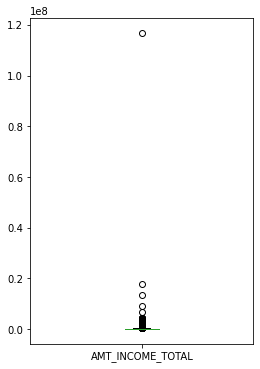

In [39]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Clearly we can see one outlier where the income is more than 100 million
- We can delete this entry because, it may affect the overall statistics matrics for the column as well as it might not be required to consider the analysis.

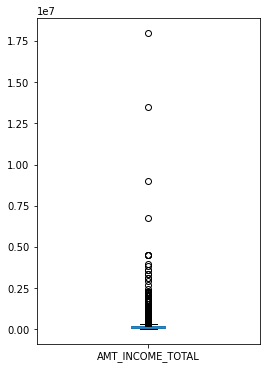

In [40]:
application_data = application_data[application_data.AMT_INCOME_TOTAL <= 100*pow(10,6)]

#Plot a box plot for this column once again

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

#### Analysis of the result:
1. Large amount of data is clustered between income of 0 to 2.5 million units.
2. There are some exceptional cases/ outliers are present for the income greater than 5 million units income. So we will again consider the income range below 5 million for further analysis.

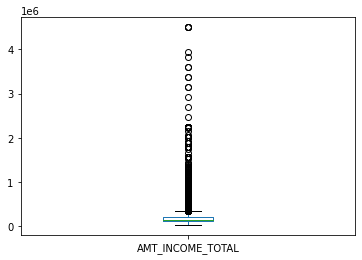

In [41]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

- Still there are some outliers/cases which should be eliminated.
- To do this, we can now analyze the AMT_INCOME_TOTAL below 1 million units and then take the decision for outliers.

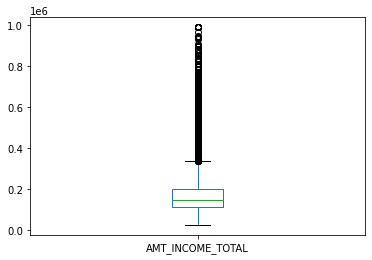

In [42]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

In [43]:
# This looks some appreciable distribution of the income values, where median is between 0.1 million to 0.2 million and 75% quantile is at 0.2 million.
# Eliminating the values that lie in the 99% to 100% quantile.

application_data = application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)]

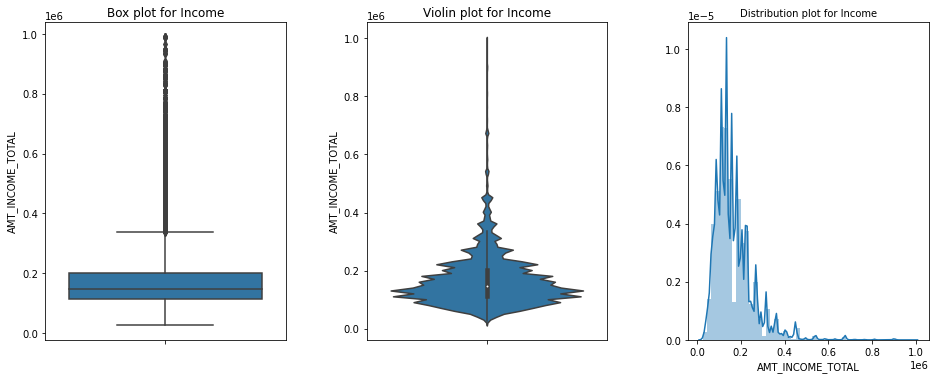

In [44]:
# Let's plot a box plot for AMT_INCOME_TOTAL
# Let's plot a violin plot for AMT_INCOME_TOTAL
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

sns.boxplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.violinplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Income')

sns.distplot(application_data.AMT_INCOME_TOTAL,ax=ax[2])
ax[2].set_title('Distribution plot for Income', fontsize=10)

plt.show()

In [45]:
#Checking the statistical information of income amount of application data

application_data.AMT_INCOME_TOTAL.describe()

count    306971.000000
mean     167214.036884
std       89609.629144
min       25650.000000
25%      112500.000000
50%      146250.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

- This looks some appreciable distribution of the income values, where median is at 0.15 million and 75% quantile is at 0.2 million and clustered outliers upto 1 million which can be taken into account for further analysis.

In [46]:
#Displaying the application data

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,2.0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,Religion


In [47]:
# Checking the number of final rows and columns again

application_data.shape

(306971, 18)

In [48]:
#Let's consider AMT_CREDIT column

application_data.AMT_CREDIT.describe()

count    3.069710e+05
mean     5.988585e+05
std      4.019353e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

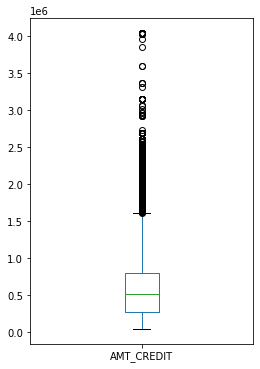

In [49]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

- There are some outliers which has value greater than 2.5 million, so we will consider only those values lesser than 2.5 for further analysis.

In [50]:
# Eliminating the values that are greater than 3.5 million

application_data = application_data[application_data.AMT_CREDIT <= 2.5*pow(10,6)]

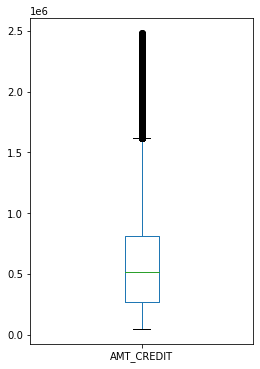

In [51]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

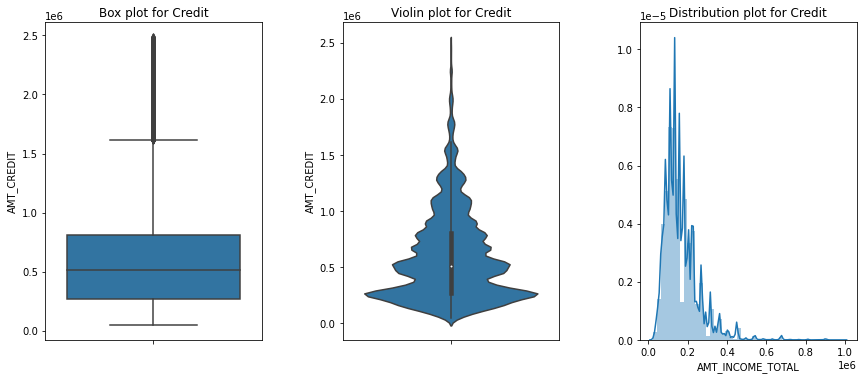

<Figure size 288x360 with 0 Axes>

In [52]:
# Let's plot a  box plot for AMT_CREDIT
# Let's plot a violin plot for AMT_CREDIT
# Let's plot a  distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(12,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,5])
sns.boxplot(application_data.AMT_CREDIT,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Credit')

sns.violinplot(application_data.AMT_CREDIT,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Credit')

sns.distplot(application_data.AMT_INCOME_TOTAL,ax=ax[2])
ax[2].set_title('Distribution plot for Credit')

plt.show()

In [53]:
#Checking the statistical information of Amount Credit of application data

application_data.AMT_CREDIT.describe()

count    3.066180e+05
mean     5.964925e+05
std      3.959352e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.130000e+05
75%      8.086500e+05
max      2.487092e+06
Name: AMT_CREDIT, dtype: float64

- This looks some appreciable distribution of the income values, where median is at 0.5 million and 75% quantile is at 0.8 million. We will take these values as final for further analysis. 

In [54]:
#Displaying the application data

application_data.shape

(306618, 18)

In [55]:
# Let's consider the column AMT_ANNUITY for the outliers.

application_data.AMT_ANNUITY.describe()

count    306618.000000
mean      27041.113173
std       14322.435261
min        1615.500000
25%       16524.000000
50%       24894.000000
75%       34587.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

In [56]:
# Check the types of values present in the AMT_ANNUITY column.

application_data.AMT_ANNUITY.dtypes

dtype('float64')

In [57]:
# Let's check the values from the columns that are not integer or float.

odd_man_out_amt_annuity = application_data.AMT_ANNUITY.apply(lambda x: 1 if ((type(x)==int) or (type(x)==float))  else 0)
application_data[odd_man_out_amt_annuity == 0]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE


In [58]:
# Consider rows from AMT_ANNIUTY column where there are no objects.

application_data = application_data[odd_man_out_amt_annuity != 0]

In [59]:
# Let's convert the int values to float.

application_data.AMT_ANNUITY = application_data.AMT_ANNUITY.apply(lambda x: float(x))

In [60]:
# Check for the type of values in ANNUITY column again

application_data.AMT_ANNUITY.dtype

dtype('float64')

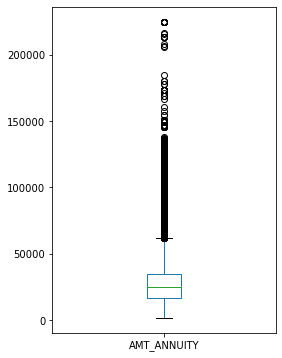

In [61]:
# Let's plot a box plot for the AMT_ANNUITY Column.

plt.figure(figsize=[4,6])
application_data.AMT_ANNUITY.plot.box()
plt.show()

In [62]:
#  Let's consider the data where AMT_ANNUITY value is < 120000 as remaining can affect our analysis.

application_data =  application_data[application_data.AMT_ANNUITY<120000]

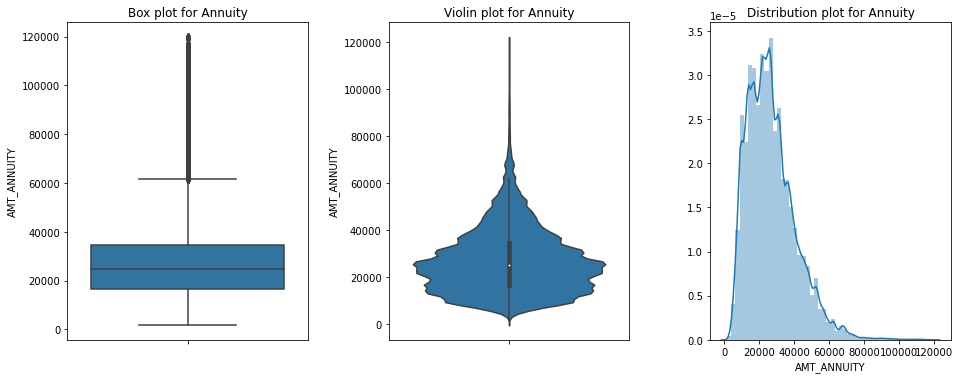

<Figure size 288x432 with 0 Axes>

In [63]:
# Let's plot a  box plot for AMT_ANNUITY
# Let's plot a violin plot for AMT_ANNUITY
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_ANNUITY,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Annuity')

sns.violinplot(application_data.AMT_ANNUITY,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Annuity')

sns.distplot(application_data.AMT_ANNUITY,ax=ax[2])
ax[2].set_title('Distribution plot for Annuity')

plt.show()

In [64]:
application_data.AMT_ANNUITY.describe()

count    306451.000000
mean      26974.737630
std       14020.199539
min        1615.500000
25%       16524.000000
50%       24885.000000
75%       34587.000000
max      119862.000000
Name: AMT_ANNUITY, dtype: float64

- This looks some appreciable distribution of the Annuity values, where median is at 24k and 75% quantile is at 34k. We will take these values as final for further analysis.

In [65]:
# Let's consider the column AMT_GOODS_PRICE for the outliers.

application_data.AMT_GOODS_PRICE.describe()

count    3.064510e+05
mean     5.352040e+05
std      3.625000e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.475000e+06
Name: AMT_GOODS_PRICE, dtype: float64

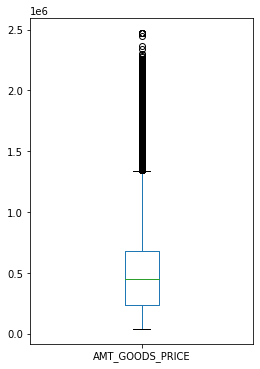

In [66]:
# Let's plot a box plot for the AMT_GOODS_PRICE Column

plt.figure(figsize=[4,6])
application_data.AMT_GOODS_PRICE.plot.box()
plt.show()

In [67]:
# Let's consider the values below 2 million units

application_data =  application_data[application_data.AMT_GOODS_PRICE<2*pow(10,6)]

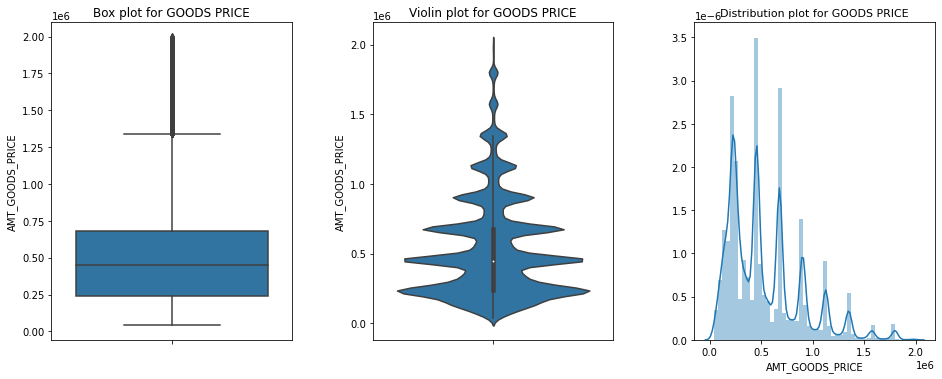

<Figure size 288x432 with 0 Axes>

In [68]:
# Let's plot a  box plot for AMT_GOODS_PRICE
# Let's plot a violin plot for AMT_GOODS_PRICE
# Let's plot a distribution plot for AMT_GOODS_PRICE

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[0])
ax[0].set_title('Box plot for GOODS PRICE')

sns.violinplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for GOODS PRICE')

sns.distplot(application_data.AMT_GOODS_PRICE,ax=ax[2])
ax[2].set_title('Distribution plot for GOODS PRICE', fontsize=11)

plt.show()

In [69]:
application_data.AMT_GOODS_PRICE.describe()

count    3.057780e+05
mean     5.315410e+05
std      3.543552e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.998000e+06
Name: AMT_GOODS_PRICE, dtype: float64

- From the above distributions we can observe that the median of goods price distribution lies at around 0.5 million and 75% quantile is at around 0.7 million whereas the maximum value reaches upto 2 million. This looks an appreciable distribution which can be finally used for further analysis. 

In [70]:
# Let's display the data again for further analysis

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,2.0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,Religion


- Now let's analyze the outliers for DAYS_BIRTH and DAYS_EMPLOYED columns
- The values in this column are taken w.r.t date of application, so we have to change the sign of the numbers for understanding purpose.
- We can then convert days to years and then assign those to new columns.

In [71]:
# Check the statistical information of the DAYS_BIRTH columns

application_data.DAYS_BIRTH.describe()

count    305778.000000
mean     -16038.556587
std        4365.780321
min      -25201.000000
25%      -19685.000000
50%      -15752.000000
75%      -12412.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [72]:
# Check the statistical information of the DAYS_EMPLOYED columns

application_data.DAYS_EMPLOYED.describe()

count    305778.000000
mean      63983.964023
std      141413.949914
min      -17912.000000
25%       -2757.000000
50%       -1211.000000
75%        -287.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

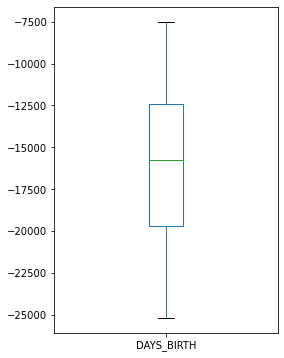

In [73]:
# Let's plot a  box plot for DAYS_BIRTH

plt.figure(figsize=[4,6])
application_data.DAYS_BIRTH.plot.box()
plt.show()

- Np such exceptional outliers can be observed from the boxplot of Days birth and thus outliders handling is not required in this case. 

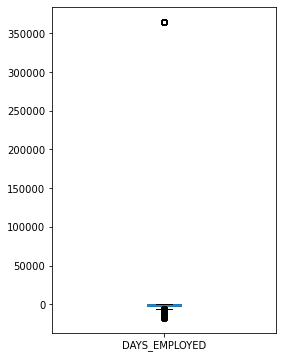

In [74]:
# Let's plot a  box plot for DAYS_EMPLOYED

plt.figure(figsize=[4,6])
application_data.DAYS_EMPLOYED.plot.box()
plt.show()

In [75]:
#Checking the percentage of values greater than 350000

(application_data[application_data.DAYS_EMPLOYED>=350000].shape[0]/application_data.shape[0])*100

18.052639496628274

- We can see there are some outliers which have values >350000, those can be positive inifinity values
- We will keep those values as null because that may affect our analysis for the columns.
- Also, assigning that large number of values with median/mean may hamper our analysis, as the percentage of such values is very huge i.e. ~18%.

In [76]:
# We can see an outlier having >350000 value.  So we can ignore such values and keep those as null
# Converting those days values into years and then storing into new columns.

application_data['YEARS_BIRTH'] = application_data.DAYS_BIRTH.apply(lambda x: -x/365.0)
application_data.DAYS_EMPLOYED[application_data.DAYS_EMPLOYED > 350000] = np.NaN
application_data['YEARS_EMPLOYED'] = application_data.DAYS_EMPLOYED.apply(lambda x: -x/365.0)

In [77]:
# Deleting the days columns

del application_data['DAYS_BIRTH']
del application_data['DAYS_EMPLOYED']

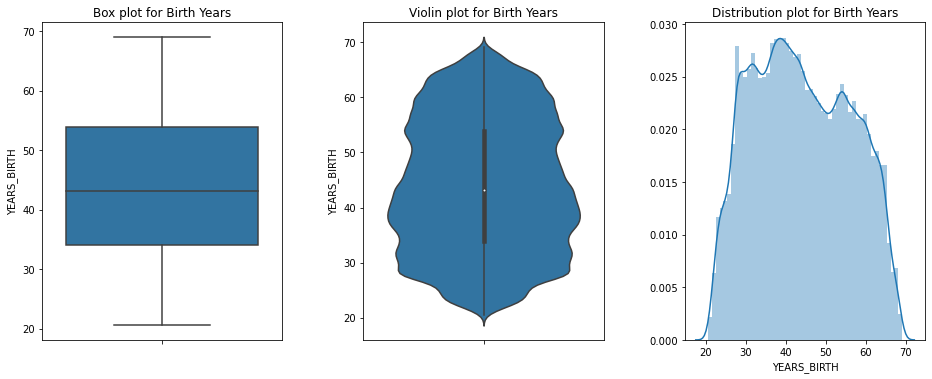

<Figure size 288x432 with 0 Axes>

In [133]:
# Let's plot a  box plot for YEARS_BIRTH
# Let's plot a violin plot for YEARS_BIRTH
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_BIRTH,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Birth Years')

sns.violinplot(application_data.YEARS_BIRTH,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Birth Years')

sns.distplot(application_data.YEARS_BIRTH,ax=ax[2])
ax[2].set_title('Distribution plot for Birth Years', fontsize=12)

plt.show()

- The values are equally spread through out the data and there are no outliers present in the data, so we dont have to deal with it. 

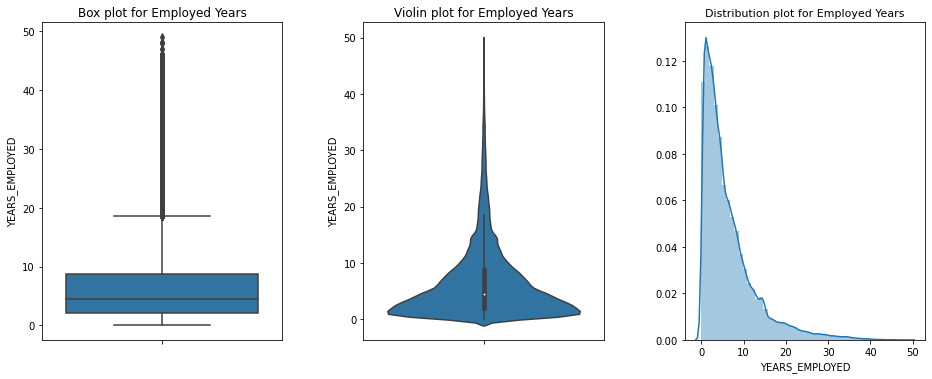

<Figure size 288x432 with 0 Axes>

In [79]:
# Let's plot a  box plot for YEARS_EMPLOYED
# Let's plot a violin plot for YEARS_EMPLOYED
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Employed Years')

sns.violinplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Employed Years')

sns.distplot(application_data.YEARS_EMPLOYED,ax=ax[2])
ax[2].set_title('Distribution plot for Employed Years', fontsize=12)

plt.show()

- Now the data imbalance is reduced significantly after replacing the outliers. We will proceed with further analysis.

## Univariate Analysis for Columns
- We will now analyze the data spread across individual columns and create some better visualizations.
- We will use various graphs such as bar graph, pie charts, histograms if required.

In [80]:
# Displaying the data again

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Business Entity Type 3,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,Business Entity Type 3,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Religion,54.608219,8.323288


## Analyzing Target customers

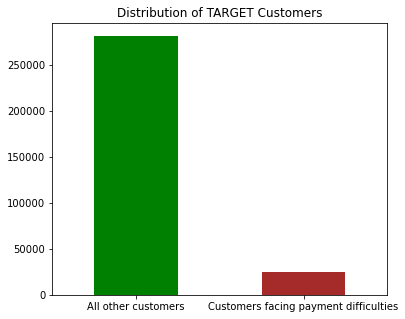

In [81]:
# Let's analyze how targeted customers are spread across the data

plt.figure(figsize=[6,5])
graph = application_data.TARGET.value_counts().plot.bar(color=['G','brown'])
plt.xticks([0,1],['All other customers','Customers facing payment difficulties'],rotation=0)
graph.set_title("Distribution of TARGET Customers")
plt.show()

* **It can be easily infer from this plot that the no. of customers facing payment issues is significantly less than the customers facing no difficultues (all other cases in our sample). Now we need to understand how consumer attributes and loan attributes influence the tendency of default which will be required ny the company for its risk asessment. So now proceeding to further unicariate analysis.** 

## Analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats

In [82]:
# Let's analyze the genders of the customers

application_data.CODE_GENDER.value_counts()

F      201483
M      104291
XNA         4
Name: CODE_GENDER, dtype: int64

In [83]:
# We have found there are some XNA values are present in Gender Category.
# we will remove those as there are very less count of such values are present (May be outliers or unknown).

application_data.CODE_GENDER = application_data.CODE_GENDER.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.CODE_GENDER = application_data.CODE_GENDER[~application_data.CODE_GENDER.isnull()]
application_data.CODE_GENDER.value_counts()

F    201483
M    104291
Name: CODE_GENDER, dtype: int64

In [135]:
# Let's analyze the loan types 

application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         276885
Revolving loans     28885
Name: NAME_CONTRACT_TYPE, dtype: int64

In [136]:
# Let's analyze the column containing customers having cars or not 

application_data.FLAG_OWN_CAR.value_counts()

0    202021
1    103749
Name: FLAG_OWN_CAR, dtype: int64

In [137]:
# Let's analyze the column containing customers having flats or not 

application_data.FLAG_OWN_REALTY.value_counts()

1    212303
0     93467
Name: FLAG_OWN_REALTY, dtype: int64

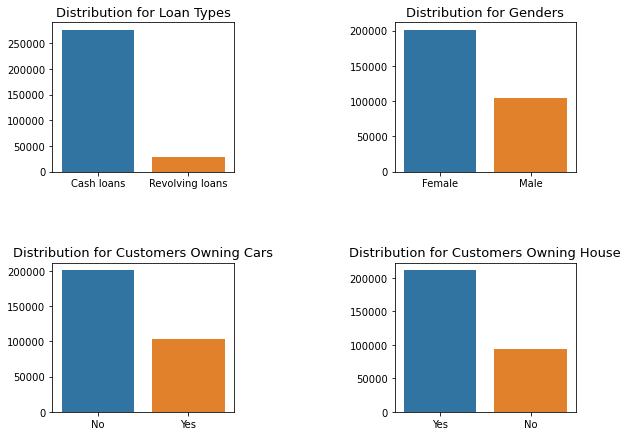

In [84]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats.

fig, ax = plt.subplots(2, 2, figsize=(8,6))
# Making a plot with 2 subplots

loan_types = application_data.NAME_CONTRACT_TYPE.value_counts()
genders = application_data.CODE_GENDER.value_counts()
owns_cars = application_data.FLAG_OWN_CAR.value_counts()
own_reality = application_data.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=13)
sns.barplot(x=loan_types.index, y=loan_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Loan Types", fontsize=13)
sns.barplot(x=genders.index, y=genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=13)
ax[0][1].set_xticklabels(['Female','Male'])
sns.barplot(x=owns_cars.index, y=owns_cars, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=13)
ax[1][0].set_xticklabels(['No','Yes'])
sns.barplot(x=own_reality.index, y=own_reality, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=13)
ax[1][1].set_xticklabels(['Yes','No'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

- From  *Distribution of Loan types* plot we can say that customers are taking more cash loans i.e. personal or business loans in cash. Very less people are going for revolving loans although it is more flexible. 
- From  *Distribution of Genders* plot it can be observed that Female borrowers are more way more than male. 
- From  *Distribution of Owning Cars* plot we can see that less customers are having cars. So peoples having having cars dont opt for loans much.:)
- From  *Distribution of Owning House* plot we can say that majority of the customers (about 70 % ) are having their own house. 

## Analysis of the children count spread across the data

In [85]:
# Let's analyze the children count spread across the data
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [86]:
# There are some exceptional cases here now, as those who customers have children more than 10 are very less in count. 
# So we can ignore those values.
application_data = application_data[application_data.CNT_CHILDREN<=10]
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
10         2
9          2
8          2
Name: CNT_CHILDREN, dtype: int64

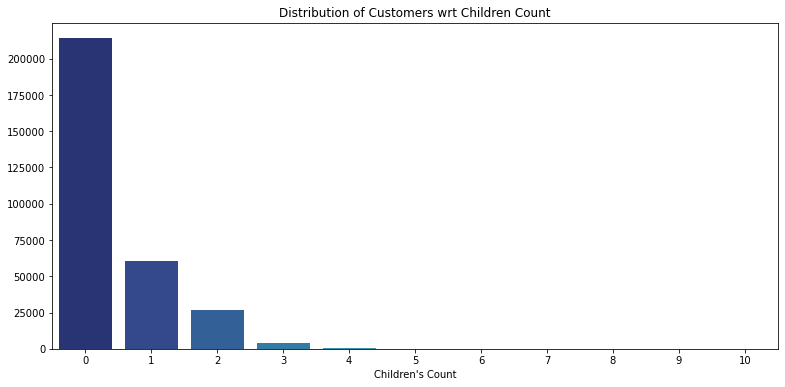

In [87]:
# Let's analyze how distribution is spread across the customers with respect to Children Count
plt.figure(figsize=[13,6])
counts = application_data.CNT_CHILDREN.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette='YlGnBu_r')
plt.xticks(rotation=0)
graph.set_title("Distribution of Customers wrt Children Count")
plt.xlabel('Children\'s Count')
plt.ylabel('')
plt.show()

- No. of customers having no children is highest. Thus we can say that may be majority of the customers having loans are unmarried and without family, may be students and young working professionals. We can get a view of this from Family status distribution. Lets check that next.  

## Analysis of customers for Income Types, Family Status, Education Types, Housing Types

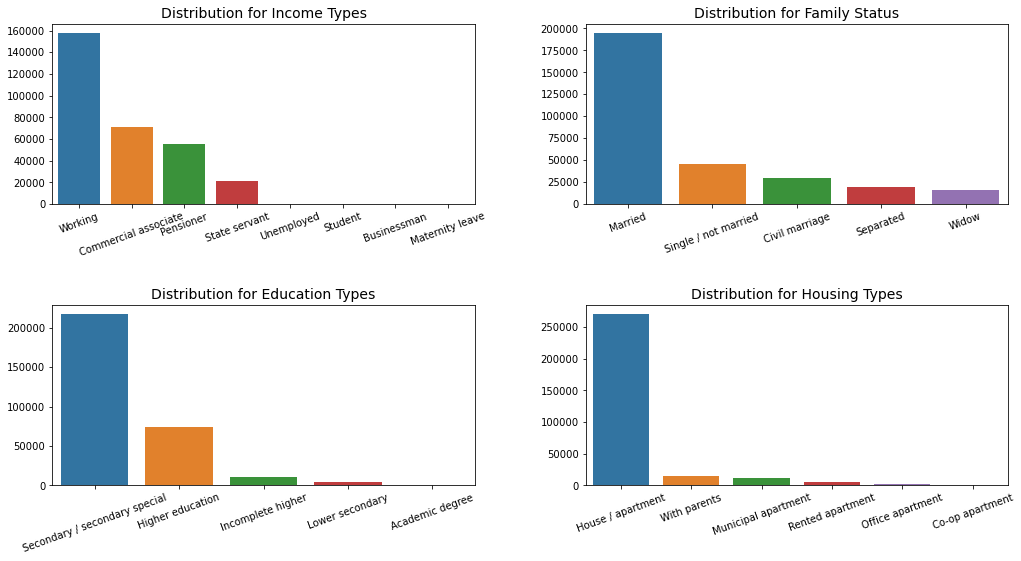

In [88]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Income Types, Family Status, Education Types, Housing Types.

fig, ax = plt.subplots(2, 2, figsize=(14,7))
# Making a plot with 2 subplots

income_types = application_data.NAME_INCOME_TYPE.value_counts()
family_status = application_data.NAME_FAMILY_STATUS.value_counts()
education_types = application_data.NAME_EDUCATION_TYPE.value_counts()
housing_types = application_data.NAME_HOUSING_TYPE.value_counts()

fig.tight_layout(h_pad=8,w_pad=8)
sns.barplot(x=income_types.index, y=income_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Income Types", fontsize=14)
sns.barplot(x=family_status.index, y=family_status, ax=ax[0][1])
ax[0][1].set_title("Distribution for Family Status", fontsize=14)
sns.barplot(x=education_types.index, y=education_types, ax=ax[1][0])
ax[1][0].set_title("Distribution for Education Types", fontsize=14)
sns.barplot(x=housing_types.index, y=housing_types, ax=ax[1][1])
ax[1][1].set_title("Distribution for Housing Types", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

- From the *Distribution of income types* plot we can infer that customers are mostly working professionals followed by commercial associate, pensioner, state servant, unemployed, student, businessman, maternity leave. Two possibilities can be there in the income types having less no. of customers   - 1. They have been rejeted 2. They cancelled it or may be didnt opt for loans. For example unempoyed would likely to be rejected by the company.
- From the *Distribution of Family status* plot we can see that mostly married customers are present. There is a significant difference between the counts of married , unmarried and other categories. So or last inference from children count plot wont stand out. Therefore combinig both we can say that no. of married customers having no children is highest.
- From the *Distribution of education types* plot it can be observed that majority of tye customers are having secondary eduction. Highly educated are less in no.
- From the *Distribution of Housing types* plot we can see that maximum customers are having house or apartments of their own which we already got an idea from the owning realty variable. People staying in rented apartments, office appartments and co-operative apartments are less in number. 

In [89]:
# Displaying the application data dataframe 

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Business Entity Type 3,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,Business Entity Type 3,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Religion,54.608219,8.323288


## Analyzing the spread of data for Organization Types

In [90]:
# Let's analyze the spread of data for Organization Types
application_data.ORGANIZATION_TYPE.value_counts()

Other                     71789
Business Entity Type 3    67509
Self-employed             38256
Medicine                  11136
Business Entity Type 2    10492
Government                10336
School                     8854
Trade: type 7              7792
Kindergarten               6861
Construction               6673
Business Entity Type 1     5926
Transport: type 4          5370
Trade: type 3              3470
Industry: type 9           3338
Industry: type 3           3272
Security                   3235
Housing                    2941
Industry: type 11          2690
Military                   2598
Bank                       2466
Agriculture                2449
Police                     2312
Transport: type 2          2197
Postal                     2149
Security Ministries        1949
Trade: type 2              1859
Restaurant                 1802
Services                   1569
University                 1318
Industry: type 7           1300
Transport: type 3          1185
Industry

- We can see hat there are lots of categories under organization type. And few of them having a number of types. To reduce the no. of category we can combine the categories having similar organization type but different types of them (For eg: transport type 1 , transport type 2 etc) and make one category as it will not affect our analysis.  

In [91]:
# Combining the categories having more than 1 types (Business entity, Transport, Industry)

def club_types(org_type):
    if ':' in org_type:
        org_type = org_type.split(':')[0]
    elif 'Type' in org_type:
        org_type = org_type.split()[0] + ' ' + org_type.split()[1]
    return org_type
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(club_types)
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity        83927
Other                  71789
Self-employed          38256
Industry               14236
Trade                  14205
Medicine               11136
Government             10336
Transport               8952
School                  8854
Kindergarten            6861
Construction            6673
Security                3235
Housing                 2941
Military                2598
Bank                    2466
Agriculture             2449
Police                  2312
Postal                  2149
Security Ministries     1949
Restaurant              1802
Services                1569
University              1318
Hotel                    962
Electricity              943
Insurance                575
Telecom                  572
Emergency                557
Advertising              426
Realtor                  391
Culture                  377
Mobile                   314
Legal Services           295
Cleaning                 260
Religion                  85
Name: ORGANIZA

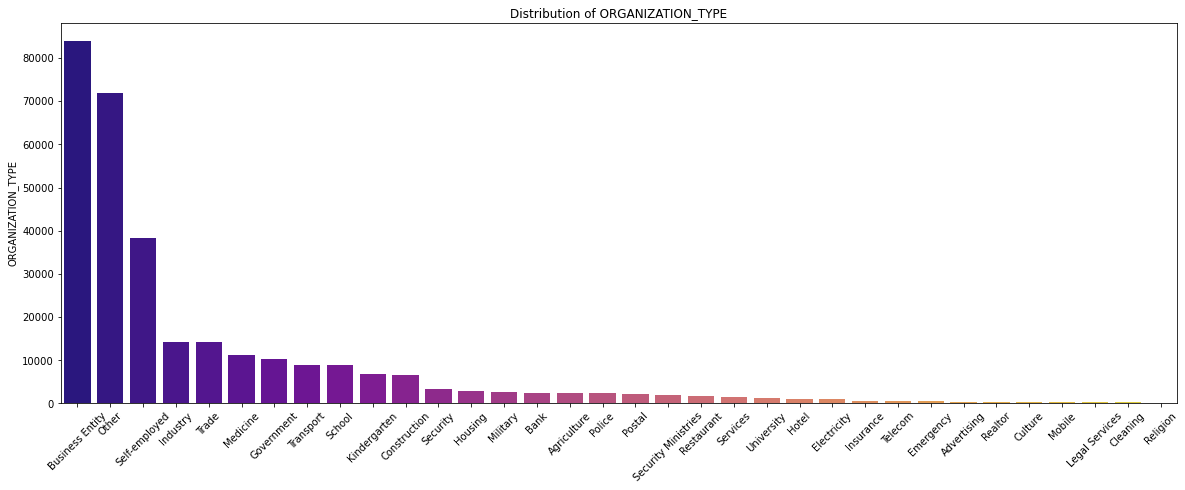

In [92]:
# Let's analyze how ORGANIZATION_TYPE types are spread across the data

plt.figure(figsize=[20,7])
counts = application_data.ORGANIZATION_TYPE.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette="plasma")
plt.xticks(rotation=45)
graph.set_title("Distribution of ORGANIZATION_TYPE")
plt.show()

- From *Distribution of Organization Type* it can be observed that Business Entity is the organization type having the highest number of customer and Religion having the least. 

In [93]:
# Displaying the application data dataframe 

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2.0,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Religion,54.608219,8.323288


## Analysis of the family member's count column

In [94]:
# Let's analyze the family member's count column

application_data.CNT_FAM_MEMBERS.value_counts()

2.0     157381
1.0      67557
3.0      52294
4.0      24564
5.0       3458
6.0        403
7.0         81
8.0         20
9.0          6
10.0         3
12.0         2
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [95]:
# We will change the type of the column from float to int
    
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.astype('int')
application_data.CNT_FAM_MEMBERS.value_counts()

2     157381
1      67557
3      52294
4      24564
5       3458
6        403
7         81
8         20
9          6
10         3
12         2
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

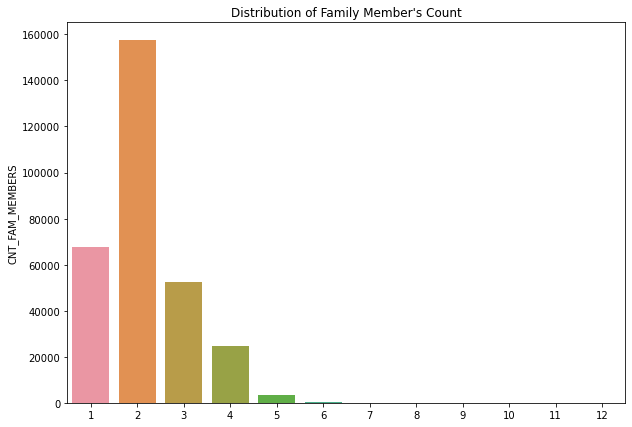

In [96]:
# Let's plot a bar graph for to visualize the districution

plt.figure(figsize=[10,7])
counts = application_data.CNT_FAM_MEMBERS.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=0)
graph.set_title("Distribution of Family Member's Count")
plt.show()

- Although number of family members ranges from 1 to 12, no, of custoners hving 2 family members is maximum.

## Analysis of Goods Amount, Annuity Amount, Credit Amount, and Income Amount

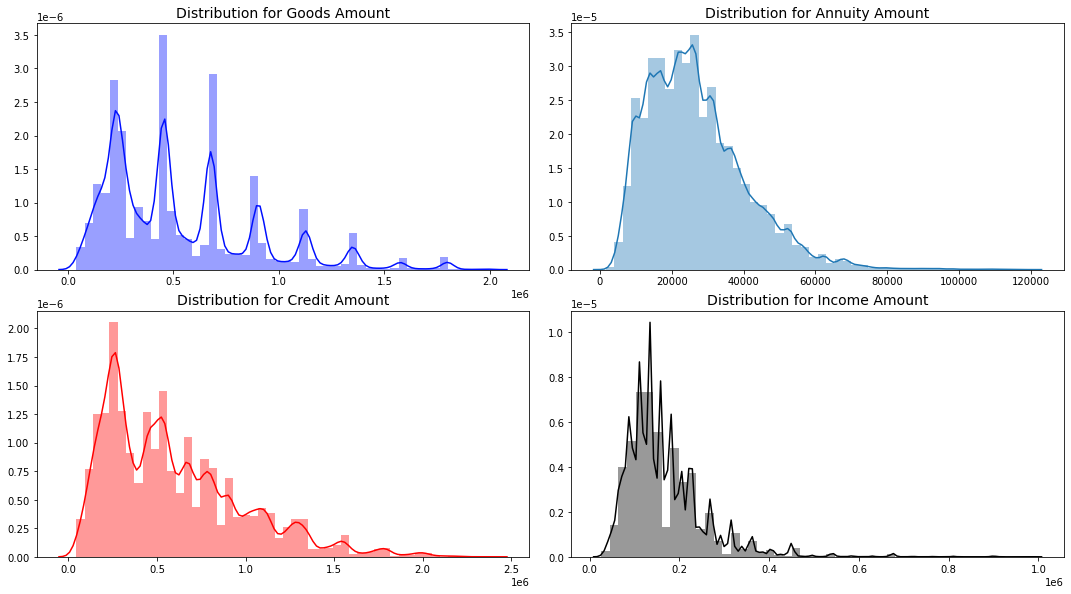

In [97]:
# We will plot multiple subplot to analyze four columns.
# There plots contain analysis of Goods Amount, Annuity Amount, Credit Amount, and Income Amount.


fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

goods = application_data.AMT_GOODS_PRICE.values
annuity = application_data.AMT_ANNUITY.values
credit = application_data.AMT_CREDIT.values
income = application_data.AMT_INCOME_TOTAL.values
fig.tight_layout(h_pad=2)
sns.distplot(goods, ax=ax[0][0], color='#000FFF')
ax[0][0].set_title("Distribution for Goods Amount", fontsize=14)
sns.distplot(annuity, ax=ax[0][1])
ax[0][1].set_title("Distribution for Annuity Amount", fontsize=14)
sns.distplot(credit, ax=ax[1][0], color="#FF0000")
ax[1][0].set_title("Distribution for Credit Amount", fontsize=14)
sns.distplot(income, ax=ax[1][1], color="#000000")
ax[1][1].set_title("Distribution for Income Amount", fontsize=14)
plt.show()

In [98]:
# Didplaying the application data dataframe

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288


In [99]:
# Let's check the shape before heading towards bivariate analysis

application_data.shape

(305770, 18)

## Bivariate for Target Column
- We will analyze the Target column with all other columns one by one to create visualizations.
- We can analyze and  visualize  the distribution of the drivng factors behind loan defaults across the customers who are facing difficulties and all other cases.
- We can thus determine what are the probable indicators that may lead the customers to default.

In [100]:
# Let's display the final cleaned data

application_data.head(7)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,2,Other,46.413699,4.350685
6,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,3,Business Entity,37.747945,8.575342


In [141]:
# Finding correlations with the target and sorted 

correlations= application_data.corr()['TARGET'].sort_values()

#Display the correlations

print(correlations)

YEARS_BIRTH        -0.078623
YEARS_EMPLOYED     -0.074849
AMT_GOODS_PRICE    -0.037633
AMT_CREDIT         -0.028100
FLAG_OWN_CAR       -0.021468
AMT_INCOME_TOTAL   -0.021420
AMT_ANNUITY        -0.009876
FLAG_OWN_REALTY    -0.006447
CNT_FAM_MEMBERS     0.009336
CNT_CHILDREN        0.019260
TARGET              1.000000
Name: TARGET, dtype: float64


Allthough Pearson correlation coefficient  is not the greatest method to represent relevance, but it can give us some ideas of possible relationships within the data.

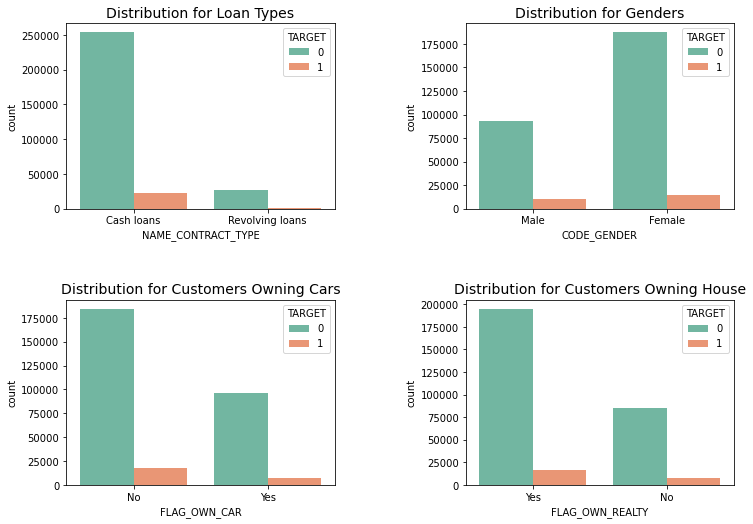

In [101]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs Contract Type, Gender, Whether Customer Owns car or not, Whether Customer owns a house/flat.

fig, ax = plt.subplots(2, 2, figsize=(10,7))
# Making a plot with 2 subplots


fig.tight_layout(h_pad=7,w_pad=10)
sns.countplot(x=application_data.NAME_CONTRACT_TYPE, hue = application_data.TARGET, ax=ax[0][0], palette = "Set2")
ax[0][0].set_title("Distribution for Loan Types", fontsize=14)
sns.countplot(x=application_data.CODE_GENDER, hue = application_data.TARGET, ax=ax[0][1], palette = "Set2")
ax[0][1].set_title("Distribution for Genders", fontsize=14)
ax[0][1].set_xticklabels(['Male','Female'])
sns.countplot(x=application_data.FLAG_OWN_CAR, hue = application_data.TARGET, ax=ax[1][0], palette = "Set2")
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=14)
ax[1][0].set_xticklabels(['No','Yes'])
sns.countplot(x=application_data.FLAG_OWN_REALTY, hue = application_data.TARGET, ax=ax[1][1], palette = "Set2")
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=14)
ax[1][1].set_xticklabels(['Yes','No'])

plt.show()

- Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

- The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans( around 10%), comparing with women( around 7%).

- The customers that own a car are almost a half of the ones that doesnot own one. The customers that own a car are less likely to not repay the loan  than the ones that doesnt own. Both categories have not-repayment rates around 8%-9%.

- The customers that own real estate are more than double of the ones that doesnot own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

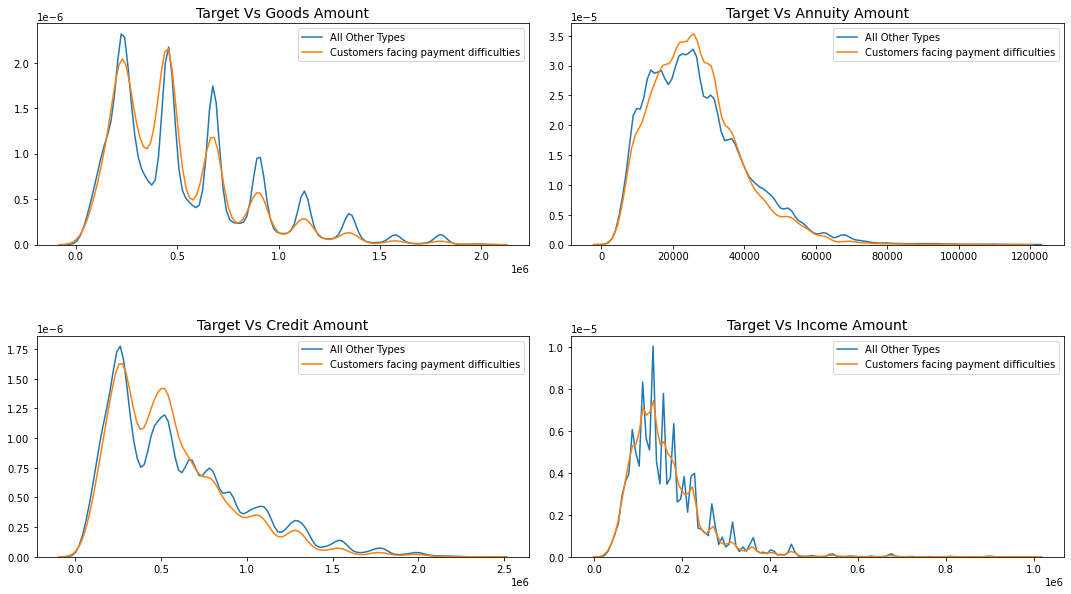

In [102]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns.
# There plots contain analysis of Target Vs Amount Goods Price, Amount Annuity Price, Amount Credit, Amount Income Total

fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].AMT_GOODS_PRICE,hist=False, label="All Other Types", ax=ax[0][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_GOODS_PRICE,hist=False, label="Customers facing payment difficulties", ax=ax[0][0])
ax[0][0].set_title("Target Vs Goods Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_ANNUITY,hist=False, label="All Other Types", ax=ax[0][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_ANNUITY,hist=False, label="Customers facing payment difficulties", ax=ax[0][1])
ax[0][1].set_title("Target Vs Annuity Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_CREDIT,hist=False, label="All Other Types", ax=ax[1][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_CREDIT,hist=False, label="Customers facing payment difficulties", ax=ax[1][0])
ax[1][0].set_title("Target Vs Credit Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_INCOME_TOTAL,hist=False, label="All Other Types", ax=ax[1][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_INCOME_TOTAL,hist=False, label="Customers facing payment difficulties", ax=ax[1][1])
ax[1][1].set_title("Target Vs Income Amount", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()


- From these 4 plots, we can't see any signicant patterns to analyse, as both the target==1 and target==0 curves showing almost similar plot pattern. For all the 4 plots, curves skew towards the lesser amount. 

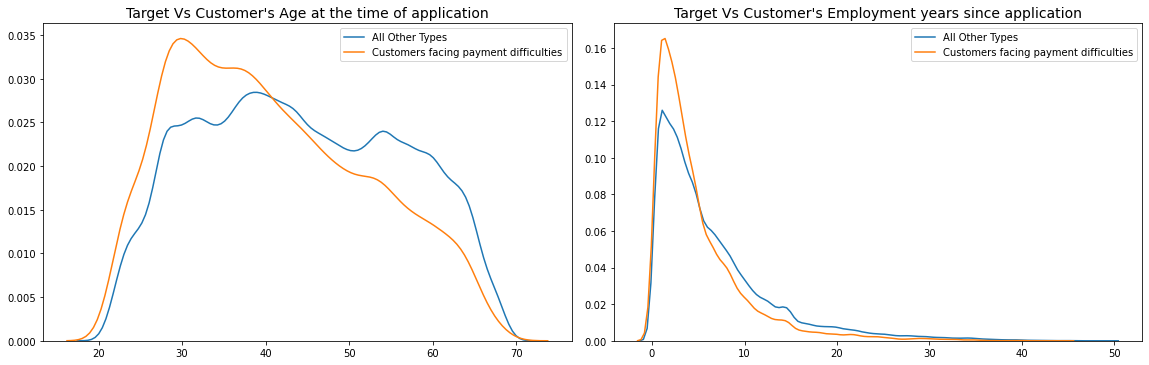

In [103]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs YEARS_BIRTH, YEARS_EMPLOYED

fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_BIRTH,hist=False, label="All Other Types", ax=ax[0])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_BIRTH,hist=False, label="Customers facing payment difficulties", ax=ax[0])
ax[0].set_title("Target Vs Customer's Age at the time of application", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_EMPLOYED,hist=False, label="All Other Types", ax=ax[1])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_EMPLOYED,hist=False, label="Customers facing payment difficulties", ax=ax[1])
ax[1].set_title("Target Vs Customer's Employment years since application", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

- From *Target Vs Customer's Age at the time of application* plot, The target ==1 curve skews towards the younger end of range. Although years birth doesnot have much significant correlation with the target (-0.07), thsi variable is likely going to be useful in machine learning model because it affects the target. And from the Target==0 curve, it can be seen that as the customer gets older, there is a negative linear relationship with the target that means as the customer gets older, they tend to repay their loans on time and younger applicants are more likely to not repay the loans.

- From *Target Vs Customers's Employment Age at the time of application* plot both of the target==1 and target==0 skews towards the lesser no. of employment years. In this case also it doesnot have much significant correlatiom with the target (-0.07).

In [104]:
# Let's display the head again

application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288


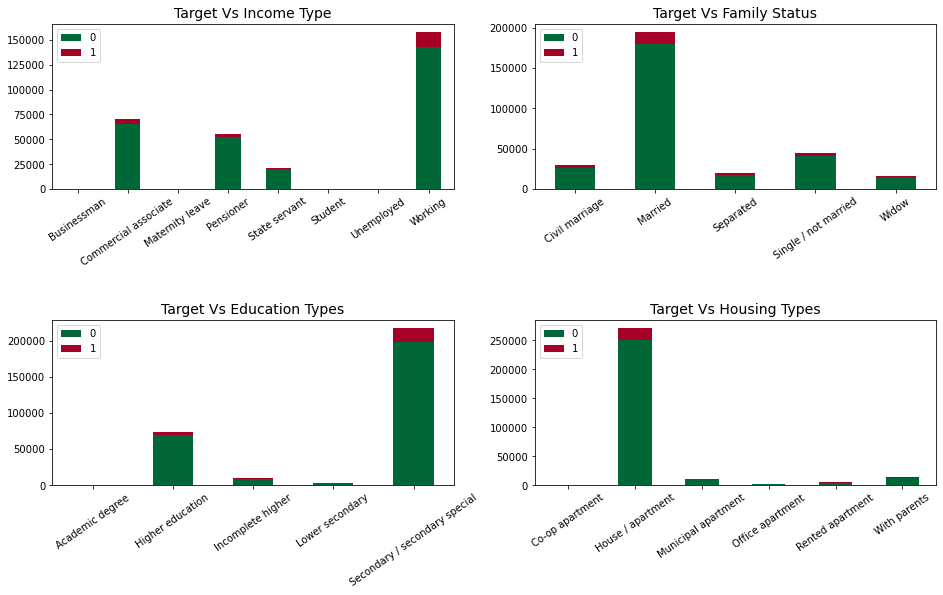

In [105]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of Target vs Income Types, Family Status, Education Types, Housing Types.

fig, ax = plt.subplots(2, 2, figsize=(13,7))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=5)

income_type = application_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().unstack()
income_type.plot(kind='bar',stacked=True, colormap= 'RdYlGn_r',ax=ax[0][0])
# sns.countplot(x=application_data.NAME_INCOME_TYPE, hue = application_data.TARGET, ax=ax[0][0])
ax[0][0].set_title("Target Vs Income Type", fontsize=14)

family_status = application_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().unstack()
family_status.plot(kind='bar',stacked=True, colormap= 'RdYlGn_r',ax=ax[0][1])
# sns.countplot(x=application_data.NAME_FAMILY_STATUS, hue = application_data.TARGET, ax=ax[0][1])
ax[0][1].set_title("Target Vs Family Status", fontsize=14)

education_type = application_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().unstack()
education_type.plot(kind='bar',stacked=True, colormap= 'RdYlGn_r',ax=ax[1][0])
# sns.countplot(x=application_data.NAME_EDUCATION_TYPE, hue = application_data.TARGET, ax=ax[1][0])
ax[1][0].set_title("Target Vs Education Types", fontsize=14)


housing_type = application_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().unstack()
housing_type.plot(kind='bar',stacked=True, colormap= 'RdYlGn_r',ax=ax[1][1])
# sns.countplot(x=application_data.NAME_HOUSING_TYPE, hue = application_data.TARGET, ax=ax[1][1])
ax[1][1].set_title("Target Vs Housing Types", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35)
    plt.legend(loc='upper left')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

- Most of applicants for loans are  Working professiinals, followed by Commercial associate, Pensioner and State servant.
The applicants with the type of income working have highest  ratio of  returning loans, followed by Commercial associate, Pensioner and State servant. They are under the average of 10% for not returning loans. whereas the income types such as Maternity leave , unemployed and students they are supposed to show some extreme different features. But from this plot, it can't be identified. so we will get these values later analysing from some other plots. 

- **Most of clients are married, followed by Single/not married and civil marriage.** we need to get the percentage of target ==1 plot 




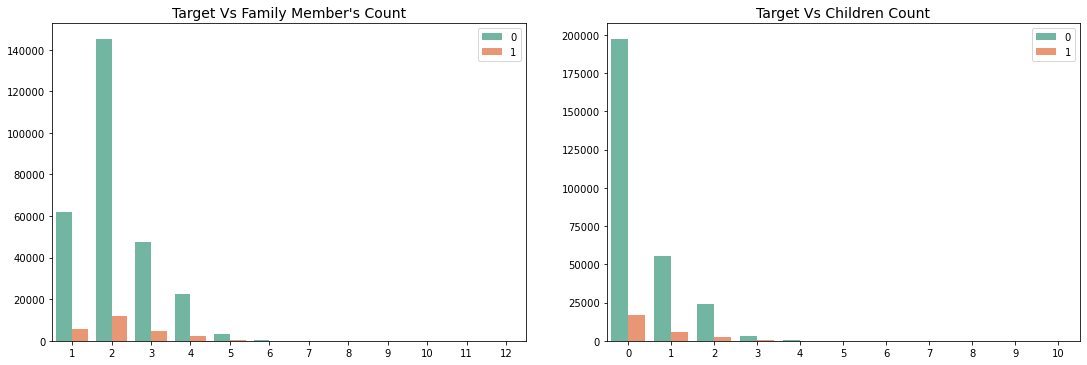

In [106]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of Target Vs Family Member's Count, Children Count.

fig, ax = plt.subplots(1, 2, figsize=(15,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=5)

sns.countplot(x=application_data.CNT_FAM_MEMBERS, hue = application_data.TARGET, ax=ax[0], palette="Set2")
ax[0].set_title("Target Vs Family Member's Count", fontsize=14)

sns.countplot(x=application_data.CNT_CHILDREN, hue = application_data.TARGET, ax=ax[1], palette="Set2")
ax[1].set_title("Target Vs Children Count", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.legend(loc='upper right')
    plt.xlabel('')
    plt.ylabel('')
plt.show()

<Figure size 1440x1440 with 0 Axes>

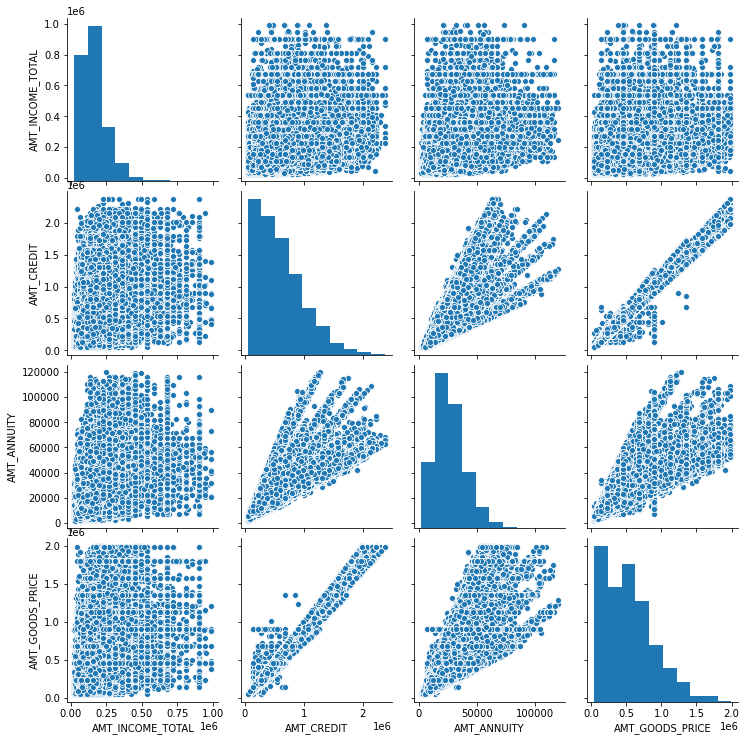

In [107]:
# Create a pair plot for Spread of Income, Credit, Annuity, Good's Price
plt.figure(figsize=[20,20])
sns.pairplot(application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

<Figure size 576x576 with 0 Axes>

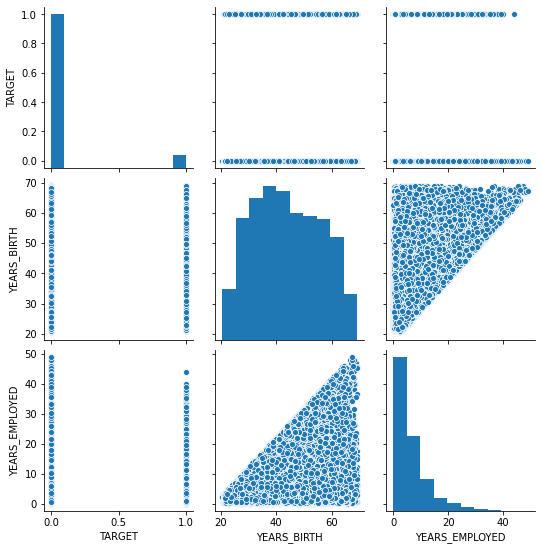

In [108]:
# Create a pair plot for Spread of Targe, Years_Birth, Years_Employed
plt.figure(figsize=[8,8])
sns.pairplot(application_data[['TARGET','YEARS_BIRTH','YEARS_EMPLOYED']])
plt.show()

## Multivariate Analysis
- In this, we will analyze different combination of factors that may affect the Target Variable.
- We will generate insights for multiple columns with the target column and check if any insights are there.

In [109]:
application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288


In [110]:
def plot_heat_maps(index, column, ax, title):
    pivot_table = pd.pivot_table(data=application_data,index=index,columns=column,values='TARGET')
    sns.heatmap(pivot_table,cmap="RdYlGn_r",vmin=0,vmax=1,annot=True,annot_kws={"size": 15},ax=ax)
    ax.set_title(title,fontsize=15)


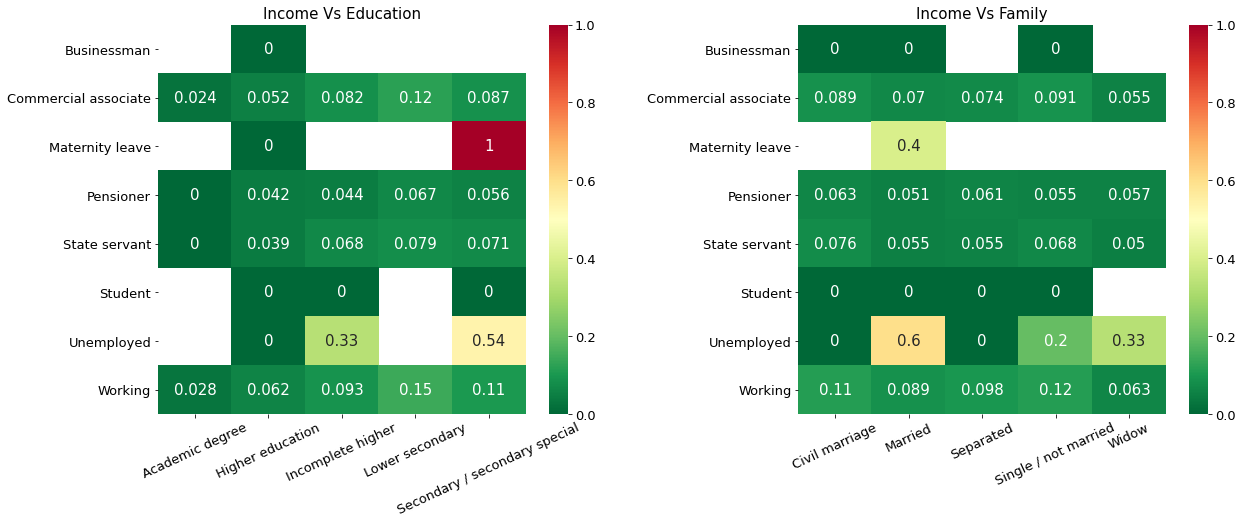

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', ax[0], 'Income Vs Education')
plot_heat_maps('NAME_INCOME_TYPE','NAME_FAMILY_STATUS',ax[1], 'Income Vs Family')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

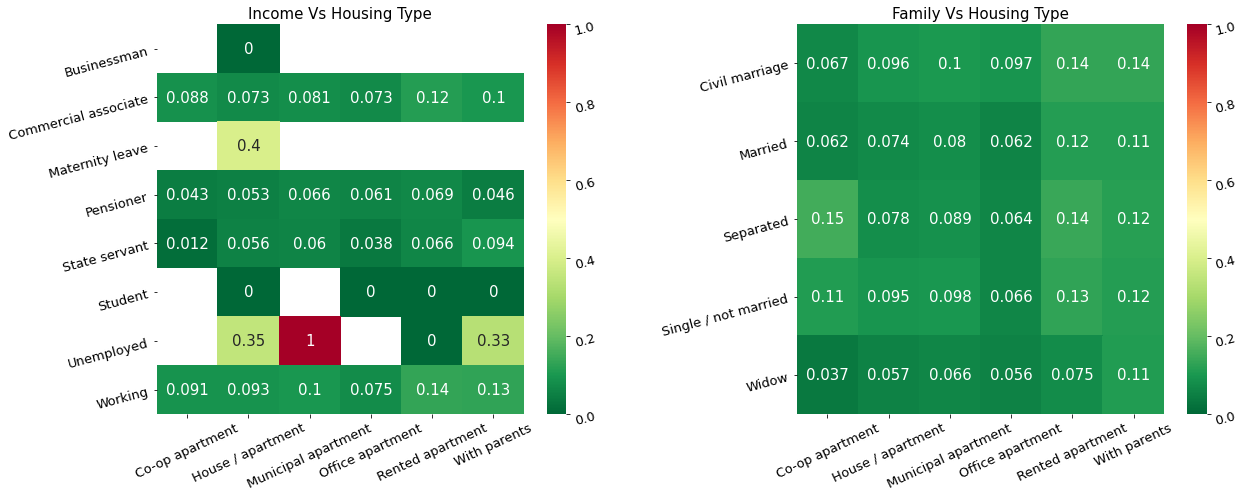

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_HOUSING_TYPE', ax[0], 'Income Vs Housing Type')
plot_heat_maps('NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', ax[1], 'Family Vs Housing Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=15)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

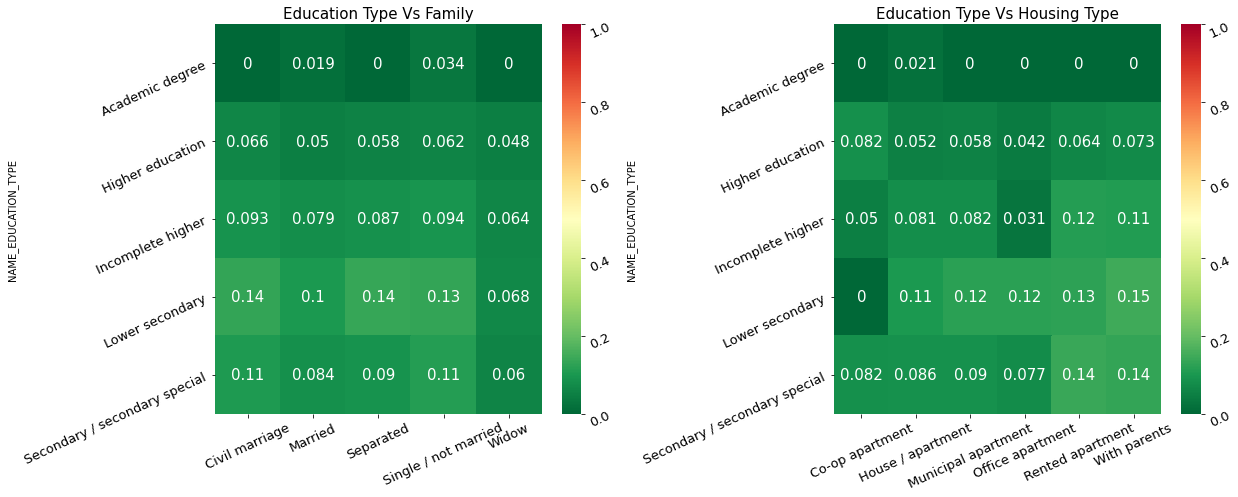

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', ax[0], 'Education Type Vs Family')
plot_heat_maps('NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',ax[1], 'Education Type Vs Housing Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.xlabel('')
plt.show()

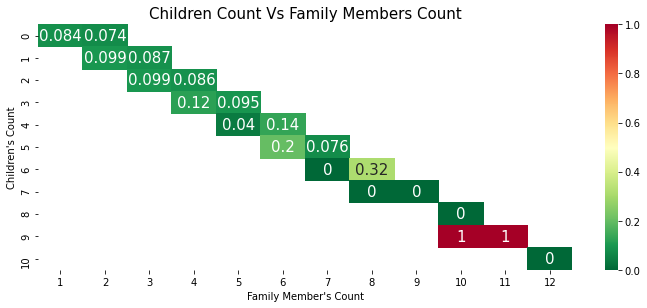

In [114]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('CNT_CHILDREN','CNT_FAM_MEMBERS', ax, 'Children Count Vs Family Members Count')
plt.xlabel('Family Member\'s Count') 
plt.ylabel('Children\'s Count')
plt.show()

In [115]:
application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288


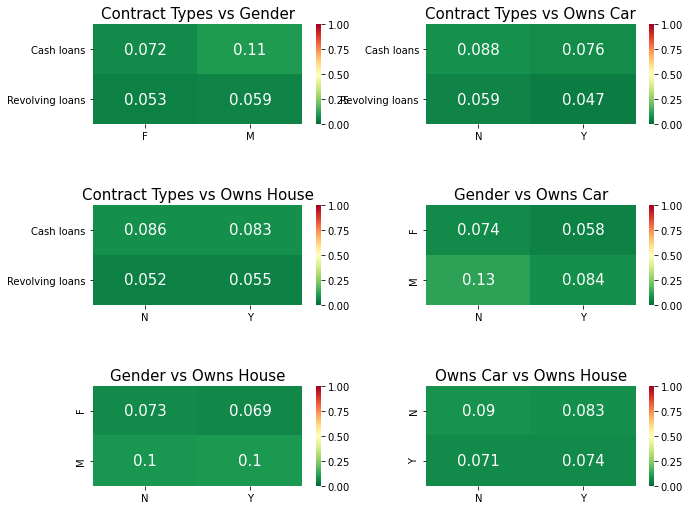

In [116]:
fig, ax = plt.subplots(3,2, figsize=(9,7))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=6,w_pad=4)

plot_heat_maps('NAME_CONTRACT_TYPE','CODE_GENDER', ax[0][0], 'Contract Types vs Gender')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_CAR', ax[0][1], 'Contract Types vs Owns Car')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_REALTY', ax[1][0], 'Contract Types vs Owns House')
plot_heat_maps('CODE_GENDER','FLAG_OWN_CAR', ax[1][1], 'Gender vs Owns Car')
plot_heat_maps('CODE_GENDER','FLAG_OWN_REALTY', ax[2][0], 'Gender vs Owns House')
plot_heat_maps('FLAG_OWN_CAR','FLAG_OWN_REALTY', ax[2][1], 'Owns Car vs Owns House')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

In [117]:
def plot_bar_plots_amount(x_axis):
    
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.violinplot(x = x_axis, y = 'AMT_INCOME_TOTAL', data = application_data, hue ='TARGET', split = True, ax=ax[0][0])
    sns.violinplot(x = x_axis, y = 'AMT_CREDIT', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.barplot(x = x_axis, y = 'AMT_ANNUITY', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.barplot(x = x_axis, y = 'AMT_GOODS_PRICE', data = application_data, hue ='TARGET', ax=ax[1][1])
    
    
    ax[0][0].set_title("Violin plot for "+ x_axis + " vs AMT_INCOME_TOTAL"  + " for Target Column",fontsize=10)
    ax[0][1].set_title("Violin plot for "+ x_axis + " vs AMT_CREDIT" + " for Target Column",fontsize=10)
    ax[1][0].set_title("Bar plot for "+ x_axis + " vs AMT_ANNUITY" + " for Target Column",fontsize=10)
    ax[1][1].set_title("Bar plot for "+ x_axis + " vs AMT_GOODS_PRICE" + " for Target Column",fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

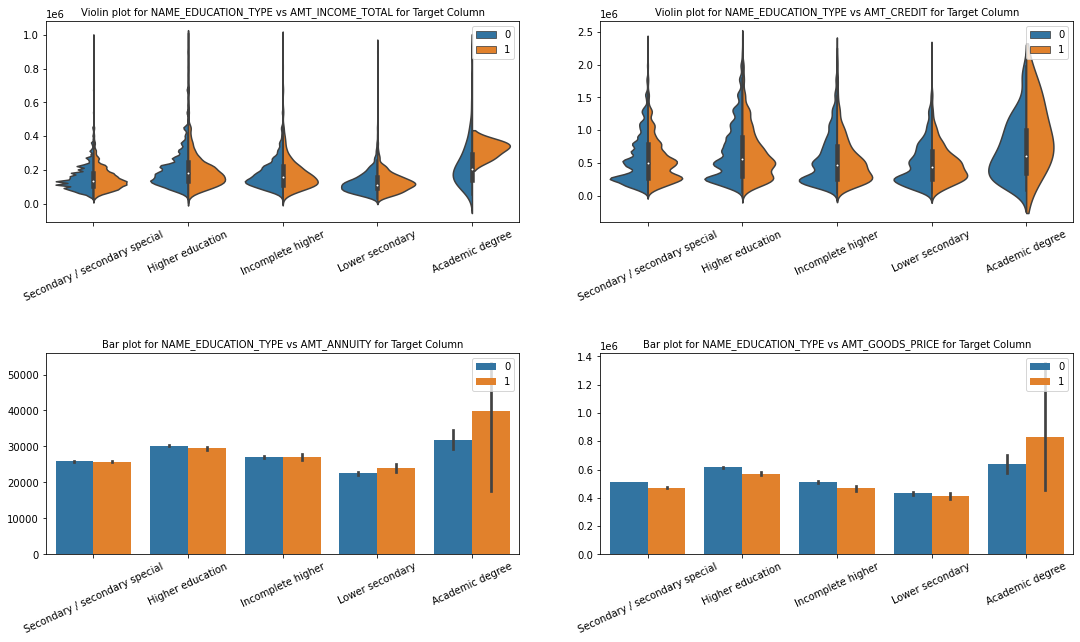

In [118]:
plot_bar_plots_amount('NAME_EDUCATION_TYPE')
plt.show()

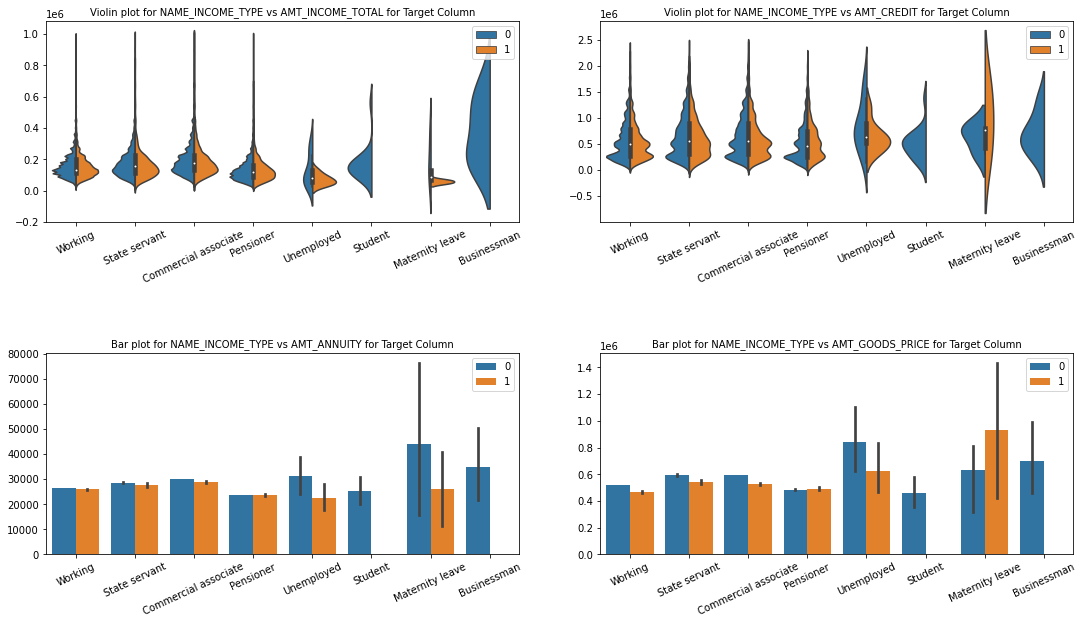

In [119]:
plot_bar_plots_amount('NAME_INCOME_TYPE')
plt.show()

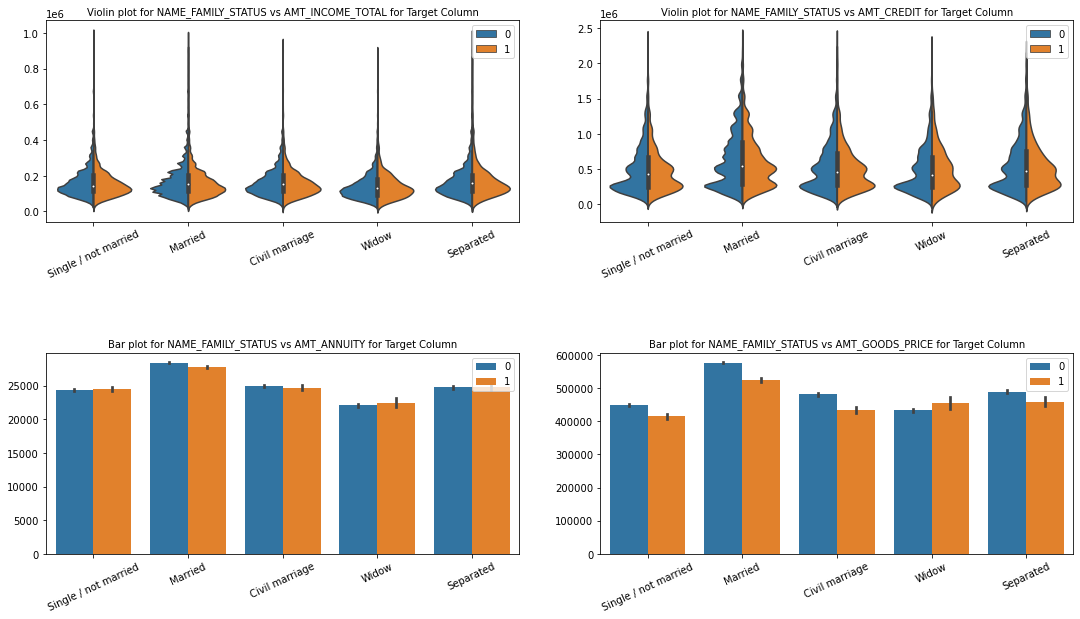

In [120]:
plot_bar_plots_amount('NAME_FAMILY_STATUS')
plt.show()

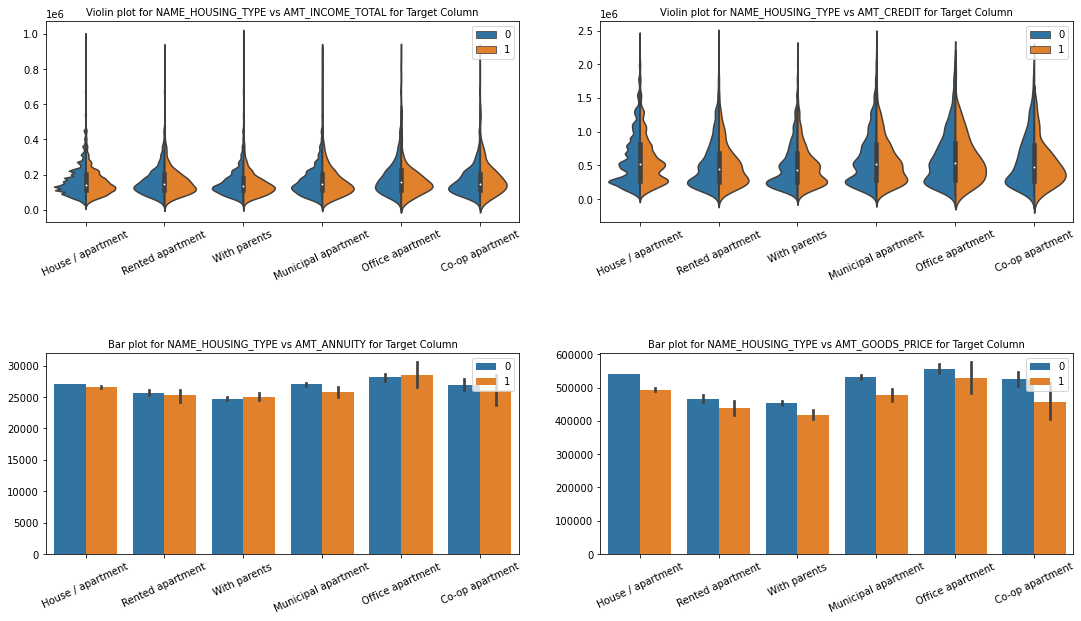

In [121]:
plot_bar_plots_amount('NAME_HOUSING_TYPE')
plt.show()

In [122]:
def plot_bar_plots_days(x_axis):
    
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.barplot(x = x_axis, y = 'YEARS_BIRTH', data = application_data, hue ='TARGET', ax=ax[0][0])
    sns.violinplot(x = x_axis, y ='YEARS_BIRTH', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.barplot(x = x_axis, y = 'YEARS_EMPLOYED', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.violinplot(x = x_axis, y ='YEARS_EMPLOYED', data = application_data, hue ='TARGET', split = True, ax=ax[1][1])
    
    
    ax[0][0].set_title("Bar plot for "+ x_axis + " vs YEARS_BIRTH"  + " for Target Column", fontsize=10)
    ax[0][1].set_title("Violin plot for "+ x_axis + " vs YEARS_BIRTH" + " for Target Column", fontsize=10)
    ax[1][0].set_title("Bar plot for "+ x_axis + " vs YEARS_EMPLOYED" + " for Target Column", fontsize=10)
    ax[1][1].set_title("Violin plot for "+ x_axis + " vs YEARS_EMPLOYED" + " for Target Column", fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

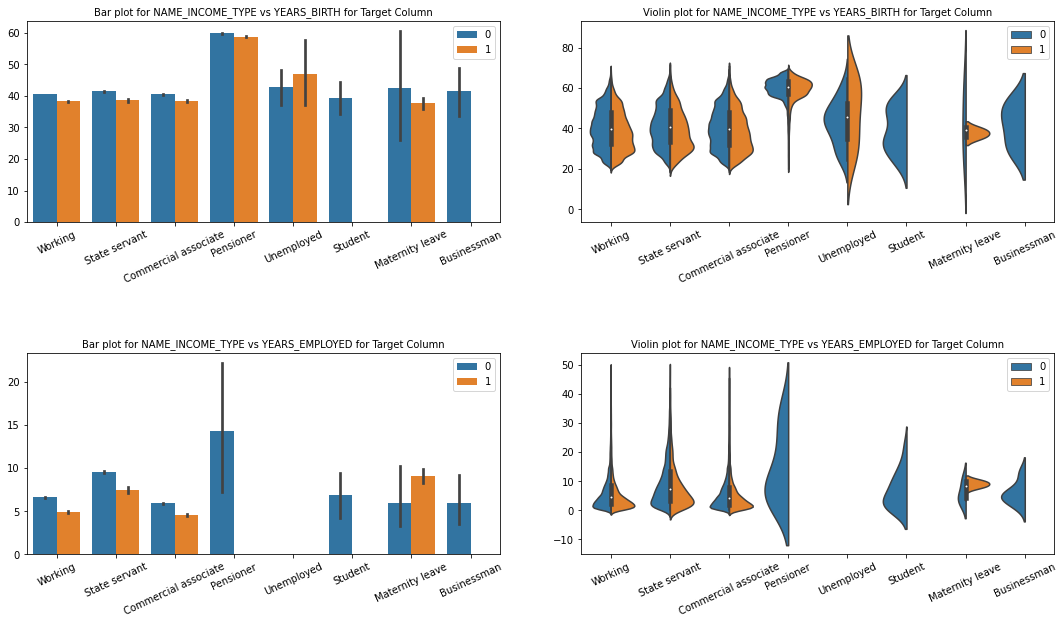

In [123]:
plot_bar_plots_days('NAME_INCOME_TYPE')
plt.show()

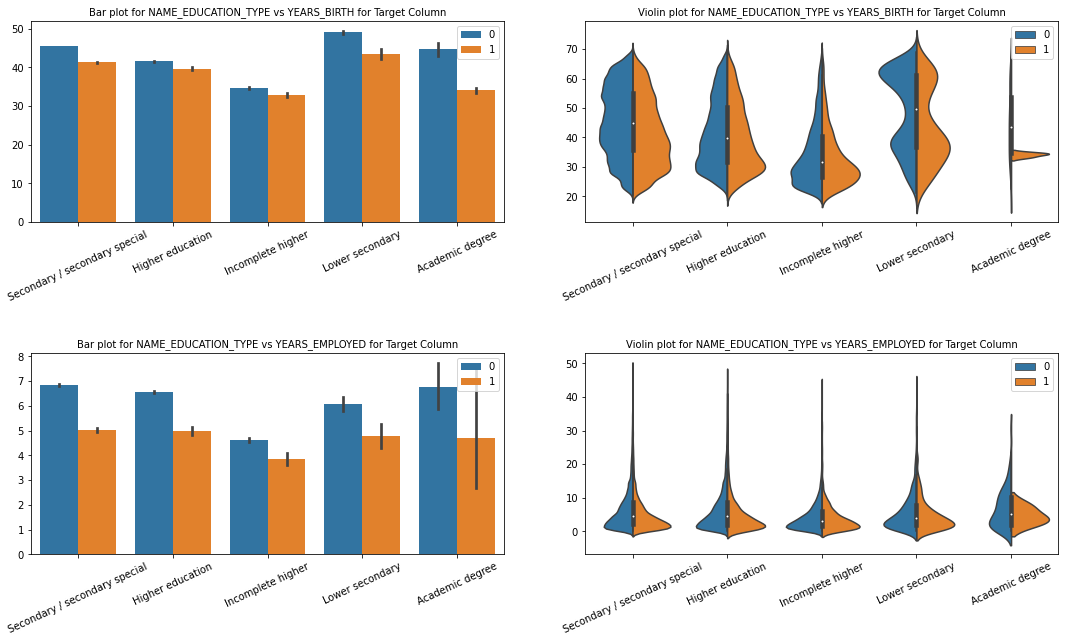

In [124]:
plot_bar_plots_days('NAME_EDUCATION_TYPE')
plt.show()

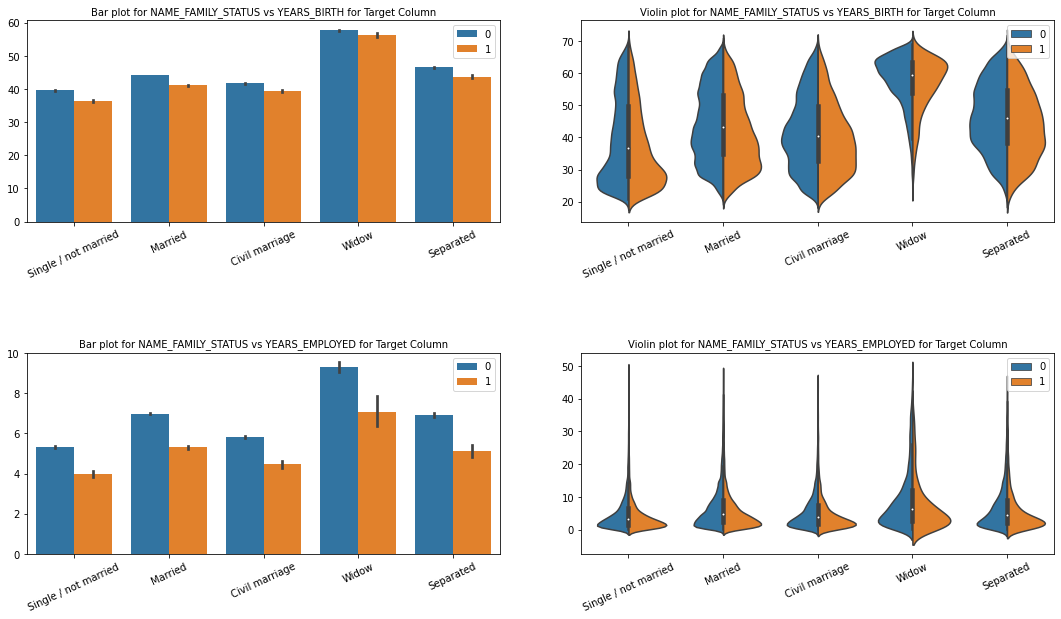

In [125]:
plot_bar_plots_days('NAME_FAMILY_STATUS')
plt.show()

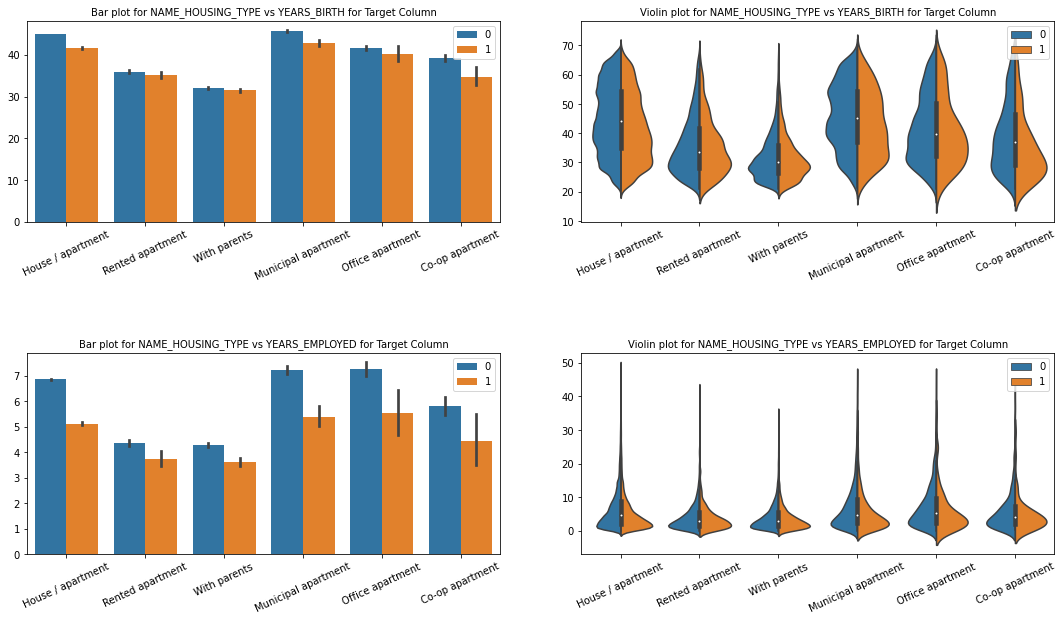

In [126]:
plot_bar_plots_days('NAME_HOUSING_TYPE')
plt.show()

In [127]:
application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288


In [128]:
application_data.AMT_GOODS_PRICE.quantile(0.80)

810000.0

In [129]:
# Let's bucket the total income of customers into 5 groups viz. '<99K','99K to 135K','135K to 162K','162K to 225K','>225K'

application_data['AMT_INCOME_RANGE'] = pd.qcut(application_data.AMT_INCOME_TOTAL,5,['<99K','99K to 135K','135K to 162K','162K to 225K','>225K'])


# Let's bucket the credit amount of customers into 5 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

application_data['AMT_CREDIT_RANGE'] = pd.qcut(application_data.AMT_CREDIT,5,['<2.5L','2.5L to 4.27L','4.2L to 6L','6L to 9L','>9L'])


# Let's bucket the annuity amount of customers into 6 groups viz. <0, 0 to 20K, 20K to 40K, 40K to 60K, 60K to 80K, >80K

application_data['AMT_ANNUITY_RANGE'] = pd.qcut(application_data.AMT_ANNUITY,5,['<14K', '14K to 21K', '21K to 27K', '27K to 37K', '>37K'])


# Let's bucket the annuity amount of customers into 6 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

application_data['AMT_GOODS_RANGE'] = pd.qcut(application_data.AMT_GOODS_PRICE,5,['<2.25L','2.25L to 3.73L','3.73L to 5.17L','5.17L to 8.1L','>8.1L'])

# Let's put the Flag values as 1's or 0's instead of Y or N for the calculational purpose

application_data.FLAG_OWN_CAR = application_data.FLAG_OWN_CAR.apply(lambda flag: 1 if flag=='Y' else 0)
application_data.FLAG_OWN_REALTY = application_data.FLAG_OWN_REALTY.apply(lambda flag: 1 if flag=='Y' else 0)

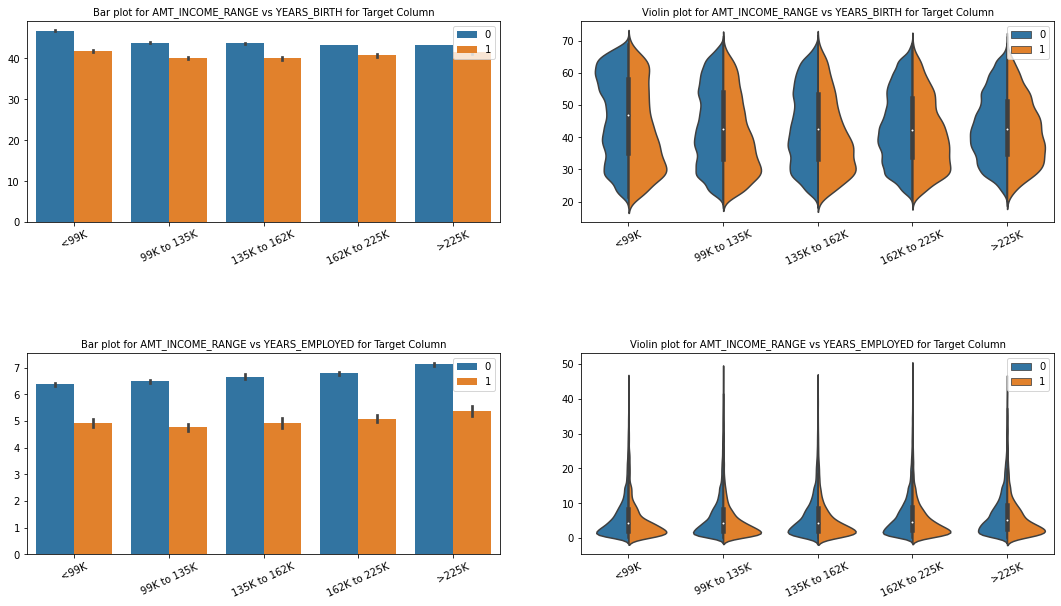

In [130]:
plot_bar_plots_days('AMT_INCOME_RANGE')
plt.show()

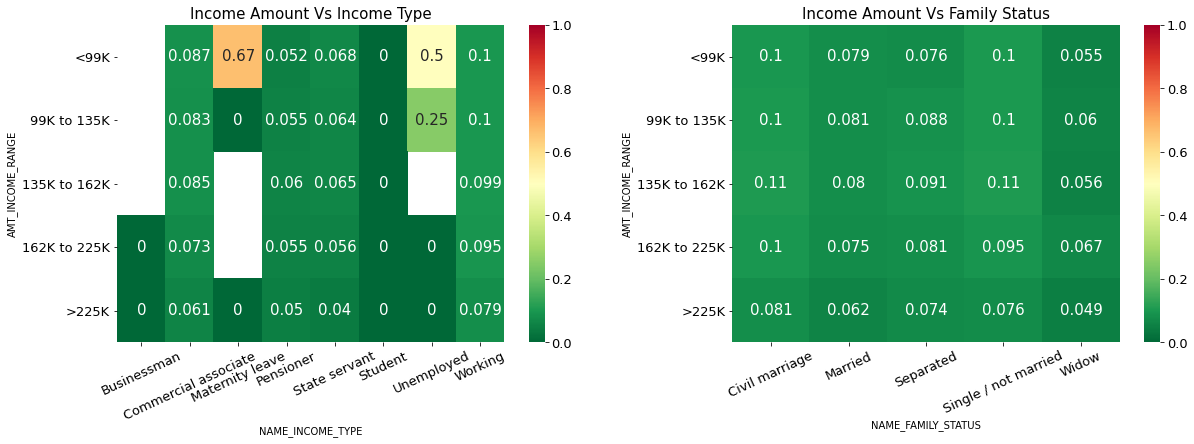

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=10)

plot_heat_maps('AMT_INCOME_RANGE','NAME_INCOME_TYPE', ax[0], 'Income Amount Vs Income Type')
plot_heat_maps('AMT_INCOME_RANGE','NAME_FAMILY_STATUS',ax[1], 'Income Amount Vs Family Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13)
    
plt.show()

In [132]:
application_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_RANGE
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Business Entity,25.920548,1.745205,162K to 225K,2.5L to 4.27L,21K to 27K,2.25L to 3.73L
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,2,School,45.931507,3.254795,>225K,>9L,27K to 37K,>8.1L
2,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Government,52.180822,0.616438,<99K,<2.5L,<14K,<2.25L
3,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,2,Business Entity,52.068493,8.326027,99K to 135K,2.5L to 4.27L,27K to 37K,2.25L to 3.73L
4,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,Religion,54.608219,8.323288,99K to 135K,4.2L to 6L,21K to 27K,3.73L to 5.17L
